In [3]:
from keras.models import Sequential #YSA modelini kullanmak için
import pandas as pd
from sklearn.model_selection import train_test_split
from textblob import TextBlob
import pandas as pd
from spacy.tokenizer import Tokenizer
from spacy.lang.tr import Turkish
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

Using TensorFlow backend.


In [4]:
from textblob import TextBlob
import pandas as pd
from spacy.tokenizer import Tokenizer
from spacy.lang.tr import Turkish
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import numpy as np

In [5]:
data = pd.read_csv('lemessi10.csv')
data

,tweet
0,leo messi cristiano special competition among ...
1,poles stop leo messi
2,la liga goal assist king champions league top ...
3,leo messi became first player score goal diffe...
4,come tomorrow start work fenerbahçe
...,...
20099,via drawing lionel messi art lionelmessi barce...
20100,lionel messi made funny comment allegations ma...
20101,lionelmessi dont worry messi father go jail gi...
20102,lionel messi without detonating bomb


In [6]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

data['Subjectivity'] = data['tweet'].apply(getSubjectivity)
data['Polarity'] = data['tweet'].apply(getPolarity)

data

,tweet,Subjectivity,Polarity
0,leo messi cristiano special competition among ...,0.586190,0.225119
1,poles stop leo messi,0.000000,0.000000
2,la liga goal assist king champions league top ...,0.766667,0.200000
3,leo messi became first player score goal diffe...,0.466667,0.125000
4,come tomorrow start work fenerbahçe,0.000000,0.000000
...,...,...,...
20099,via drawing lionel messi art lionelmessi barce...,0.000000,0.000000
20100,lionel messi made funny comment allegations ma...,1.000000,0.250000
20101,lionelmessi dont worry messi father go jail gi...,0.375000,-0.050000
20102,lionel messi without detonating bomb,0.000000,0.000000


In [7]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
data['Analysis'] = data['Polarity'].apply(getAnalysis)
data

,tweet,Subjectivity,Polarity,Analysis
0,leo messi cristiano special competition among ...,0.586190,0.225119,Positive
1,poles stop leo messi,0.000000,0.000000,Neutral
2,la liga goal assist king champions league top ...,0.766667,0.200000,Positive
3,leo messi became first player score goal diffe...,0.466667,0.125000,Positive
4,come tomorrow start work fenerbahçe,0.000000,0.000000,Neutral
...,...,...,...,...
20099,via drawing lionel messi art lionelmessi barce...,0.000000,0.000000,Neutral
20100,lionel messi made funny comment allegations ma...,1.000000,0.250000,Positive
20101,lionelmessi dont worry messi father go jail gi...,0.375000,-0.050000,Negative
20102,lionel messi without detonating bomb,0.000000,0.000000,Neutral


In [8]:
data['Analysis'] = preprocessing.LabelEncoder().fit_transform(data['Analysis'])
label = data['Analysis']
print(label)

0        2
1        1
2        2
3        2
4        1
        ..
20099    1
20100    2
20101    0
20102    1
20103    1
Name: Analysis, Length: 20104, dtype: int32


In [9]:
vect = TfidfVectorizer(analyzer='word',lowercase=False)
sent_vector = vect.fit_transform(data['tweet'])
print(sent_vector)

  (0, 4901)	0.24890649791616995
  (0, 8400)	0.2248843852005883
  (0, 9616)	0.3005265054293155
  (0, 10463)	0.26443682295436655
  (0, 10755)	0.12437836632510421
  (0, 10674)	0.3197556424753424
  (0, 7505)	0.2278590916842625
  (0, 7275)	0.23068237973977024
  (0, 5929)	0.23467514211515997
  (0, 6787)	0.22452939908218347
  (0, 11463)	0.2566928707888658
  (0, 3862)	0.2623376404230149
  (0, 13088)	0.16746638314826084
  (0, 513)	0.2594037296105074
  (0, 2752)	0.2533717944917551
  (0, 11704)	0.2371030045770058
  (0, 3021)	0.1715437410829645
  (0, 8023)	0.04858473815579372
  (0, 7227)	0.12901752474861564
  (1, 11908)	0.5178896470172775
  (1, 9848)	0.7899569787592855
  (1, 8023)	0.11568574755708025
  (1, 7227)	0.30720529460603546
  (2, 1170)	0.2186445418362964
  (2, 5348)	0.18889864998589814
  :	:
  (20100, 7616)	0.44798571528983555
  (20100, 12290)	0.16821154871745747
  (20100, 8023)	0.06011974980385498
  (20101, 6545)	0.4695915522642063
  (20101, 13604)	0.38123226179833347
  (20101, 4240)	0.31

In [10]:
y=data.Analysis.values
features=data.tweet.values
y
features

array(['leo messi cristiano special competition among us easy situation keep high level long rivalry ronaldo remain peoples mind forever',
       'poles stop leo messi',
       'la liga goal assist king champions league top scorer name deserving mediocre team valde alone sirtladiballondor goat leo messi ballondor',
       ...,
       'lionelmessi dont worry messi father go jail give total million euros lionel messi',
       'lionel messi without detonating bomb',
       'lionel messi lottery offer galatasaraya'], dtype=object)

In [11]:
X_train ,X_test,y_train,y_test = train_test_split(sent_vector,data['Analysis'],test_size=0.2,random_state=0)
X_train

<16083x14056 sparse matrix of type '<class 'numpy.float64'>'
	with 137288 stored elements in Compressed Sparse Row format>

In [12]:
from keras.utils import to_categorical

train_encoded = to_categorical(y_train)
test_encoded = to_categorical(y_test)
print(train_encoded)
print(test_encoded)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [13]:
from tensorflow.keras.layers import Dense #YSA da katman oluşturma
import tensorflow

model = tensorflow.keras.Sequential()

model.add(Dense(8, activation='relu',input_dim=14056))

model.add(Dense(32,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(3,activation='softmax'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])# model derleme

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 112456    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 115,051
Trainable params: 115,051
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.build()

In [16]:
a_x_train = X_train.toarray()
a_x_test = X_test.toarray()

history=model.fit(a_x_train,train_encoded,batch_size=10,epochs=20,verbose=1,validation_data=(a_x_test,test_encoded))

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1593/1609 [============================>.] - ETA: 0s - loss: 0.4234 - accuracy: 0.7019WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000026020450A68> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=1

In [17]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training accuracy')
    plt.plot(x, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

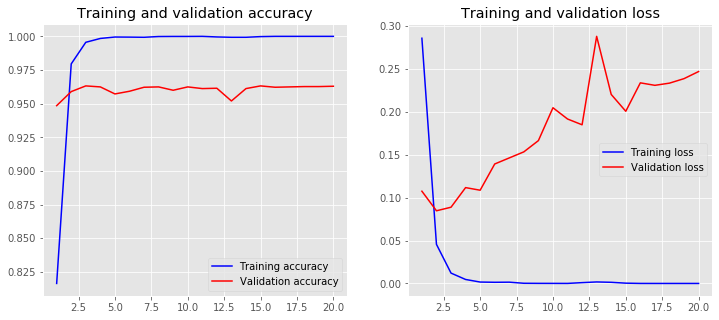

In [18]:
plot_history(history)

In [19]:
from sklearn.svm  import SVC

svc = SVC(kernel='linear')#poly,linear,rbf,C = 0.5
#eğitim başlıyor
fit = svc.fit(X_train,y_train)
print(fit)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [20]:
#test veri kümesini sınıflandırıcıya gönder
res = svc.predict(X_test)
print(res)

[2 1 0 ... 1 2 1]


In [21]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,res)
print(acc)

0.9621984580950013


In [22]:
score = model.evaluate(a_x_test, test_encoded, verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

126/126 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.9629
Test loss: 0.2471540868282318 / Test accuracy: 0.9629445672035217


In [23]:
pred= model.predict(a_x_test,batch_size=10,verbose=1)
print(f'Predict: {pred[0]}')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
403/403 [==============================] - 0s 970us/step
Predict: [1.7724075e-21 2.5790300e-17 1.0000000e+00]


In [36]:
from sklearn.metrics import f1_score
score_f1 = f1_score(y_test,res, average='macro')
print('F-Measure: %.3f' % score_f1)

F-Measure: 0.944


In [35]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, res, average='macro')
print('Recall: %.3f' % recall)

Recall: 0.926


In [37]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test, res)) 

0.9335620353407431


In [39]:
from sklearn.metrics import precision_score
print(precision_score(y_test, res,average='macro'))

0.9668075991804805
